JURNAL MODUL 4

TRANSFORMASI WAVELET

In [462]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

fungsi diatas merupakan fungsi untuk memanggil library yang sudah ada dalam python,
cv2 library python yang berfungsi untuk membaca, menampilkan, dan menyimpan gambar,
matplotlib library python yang berfungsi untuk memvisualisasikan data,
numpy library python yang berfungsi untuk melakukan operasi vektor dan matriks dengan mengolah array multidimensi.

In [463]:
ll = plt.imread("LL.jpg")
hl = plt.imread("HL.jpg")
lh = plt.imread("LH.jpg")
hh = plt.imread("HH.jpg")

pada code diatas berfungsi untuk memanggil atau membaca empat jenis gambar yang telah disediakan pada jurnal. yaitu LL, LH, HL, dan HH yang akan digunakan untuk transformasi wavelet dengan cara rekonstruksi dan dekomposisi wavelet. 

In [464]:
gray1 = cv2.cvtColor(ll, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(hl, cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(lh, cv2.COLOR_BGR2GRAY)
gray4 = cv2.cvtColor(hh, cv2.COLOR_BGR2GRAY)

code diatas berfungsi untuk merubah warna citra dari warna BGR menjadi gray, sehingga citra tersebut dapat dilakukan perubahan transformasi rekonstruksi dan dekomposisi wavelet.

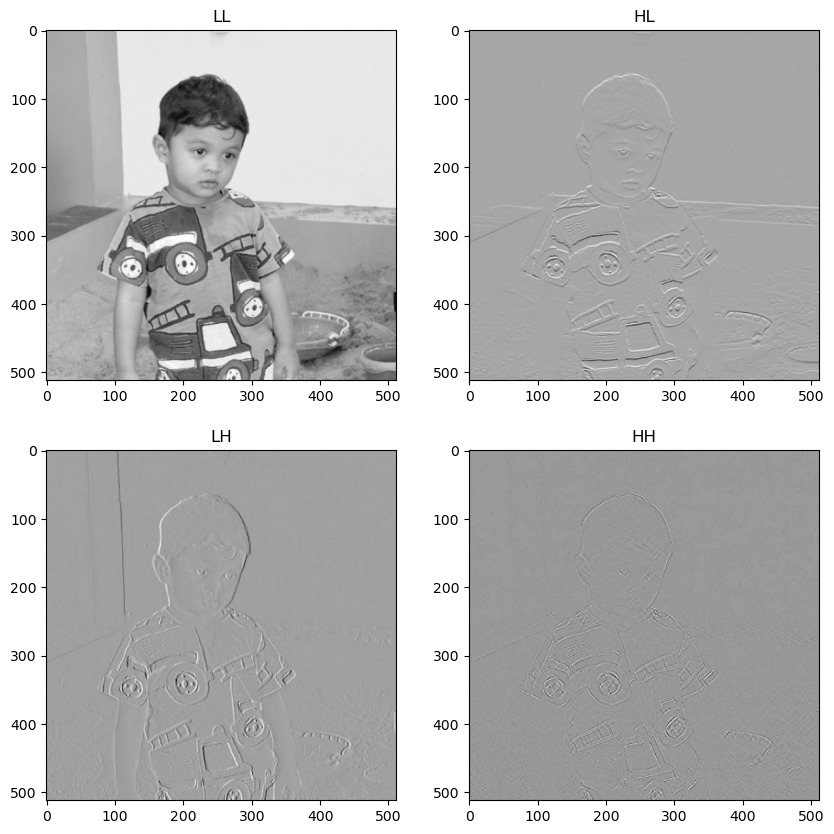

In [465]:
plt.figure(figsize=[10,10])
plt.subplot(221)
plt.title("LL")
plt.imshow(gray1, cmap='gray')
plt.subplot(222)
plt.title("HL")
plt.imshow(gray2, cmap='gray')
plt.subplot(223)
plt.title("LH")
plt.imshow(gray3, cmap='gray')
plt.subplot(224)
plt.title("HH")
plt.imshow(gray4, cmap='gray')

code diatas untuk menampilkan citra gray yang telah disediakan sebelumnya dengan memberikan judul yang sesuai dengan citra tersebut. disini akan menampilkan 4 citra dengan title yang sesuai dengan citra tersebut.

NOMOR 1

Lakukan Rekonstruksi Wavelet terhadap citra pada folder assets

In [466]:
def rekonstruksi(ll, lh, hl, hh):
    t, l = ll.shape
    
    LL = np.zeros((2*t, 2*l))
    LH = np.zeros((2*t, 2*l))
    HL = np.zeros((2*t, 2*l))
    HH = np.zeros((2*t, 2*l))
    
    for i in range(t):
        for j in range(l):
            LL[2*i, 2*j] = ll[i, j]
            LH[2*i, 2*j] = lh[i, j]
            HL[2*i, 2*j] = hl[i, j]
            HH[2*i, 2*j] = hh[i, j]
    
    for i in range(2*t):
        for j in range(0, 2*l, 2):
            LL[i, j] = LL[i, j-1] = LL[i, j]
            LH[i, j] = LH[i, j-1] / 2
            HL[i, j] = HL[i, j-1] = HL[i, j]
            HH[i, j] -= HH[i, j-1] / 2
            
    for i in range(0,2*t,2):
        for j in range(2*l):
            LL[i, j] = LL[i-1, j] = LL[i, j]
            LH[i, j] = LH[i-1, j] = LH[i, j]
            HL[i, j] -= HL[i-1, j] / 2
            HH[i, j] -= HH[i-1, j] / 2
    
    image = LL + LH + HL + HH
    
    return image


pada code diatas merupakan code yang berfungsi sebagai fungsi rekonstruksi citra dengan 4 gambar. langkah pertama yang dilakukan adalah mengetahui ukuran panjang dan lebar citra tersebut kemudian membuat array kosong sebanyak 4 untuk menampung LL, LH, HL dan HH dengan ukuran 2 kali dari panjang dan lebar citra tersebut. setelah melakukan proses tersebut akan dilakukannya upsampling pada masing-masing dari LL, LH, HL dan HH  langkah terakhir adalah melalukan fiterisasi dengan rumus rekonstruksi wavelet dan menjadikan satu atau menggabungkan LL, LH, HL dan HH ke dalam variabel image dan akan mengembalikan nilai dari image tersebut.

Text(0.5, 1.0, 'Rekontruksi Wavelet')

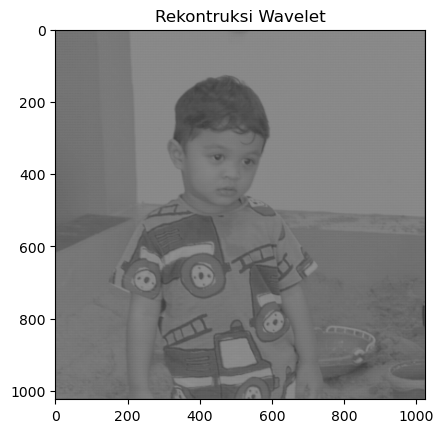

In [467]:
hasil = rekonstruksi(gray1, gray2, gray3, gray4)
plt.imshow(hasil, cmap='gray') 
plt.title("Rekontruksi Wavelet")

pada code di atas merupakan code untuk memanggil fungsi rekonstruksi yang telah dibuat sebelumnya dengan membuat variabel baru dan memanggil fungsi tersebut dengan 4 parameter yaitu gray1, gray2, gray3, gray4 yang merupakan LL, HL, LH, HH dan kemudian menampilkan kelayar dengan fungsi dari matplotlib yaitu imshow dan mengubah gambar menjadi gray.

Kernel

In [468]:
lowPass = np.array([0.7, 0.7])
highPass = np.array([-0.7, 0.7])

code di atas merupakan code yang akan digunakan untuk melakukan dekomposisi dengan kernel yang telah ditentukan dengan low pass filter dan high pass filter pada code diatas tersebut.

NOMOR 2

Lakukan Dekomposisi Wavelet Level 1 pada citra hasil rekonstruksi menggunakan kernel X

In [469]:
def dekomposisi(img):
    T, L = img.shape
    t = int(T/2); l = int(L/2)
    ll = np.zeros([t,l])
    lh = np.zeros([t,l])
    hl = np.zeros([t,l])
    hh = np.zeros([t,l])
    
    for i in range(0,T,2):
        for j in range(0,L,2):
            x = int(i/2); y = int(j/2)
            
            z = np.zeros(4)
            z[0] = img[i][j]
            z[1] = img[i][j+1]
            z[2] = img[i+1][j]
            z[3] = img[i+1][j+1]
            
            ll[x][y] = (lowPass[0]*z[0] + lowPass[1]*z[1] + lowPass[0]*z[2] + lowPass[1]*z[3])
            hl[x][y] = (highPass[0]*z[0] + highPass[1]*z[1] + highPass[0]*z[2] + highPass[1]*z[3])
            lh[x][y] = (lowPass[0]*z[0] + lowPass[1]*z[1] - lowPass[0]*z[2] - lowPass[1]*z[3])
            hh[x][y] = (highPass[0]*z[0] + highPass[1]*z[1] - highPass[0]*z[2] - highPass[1]*z[3])
    return ll, hl, lh, hh


code diatas merupakan code yang digunakan untuk melakukan dekomposisi level 1, langkah pertama yang dilakukan adalah mengetahui ukuran panjang dan lebar citra menggunakan fungsi shape kemudian akan dibagi dengan 2, setelah melakukan proses tersebut dibuatkan 4 array kosong untuk menampung LL, LH, HL, dan HH. kemudian akan melakukan perulangan dengan langkah yang dimulai dari 0 sampai dengan T dan L dengan langkah sebesar 2, lalu akan mendeklarasikan x = i/2 dan y=j/2, dan z merupakan array kosong yang terdiri dari 4 element yang telah dijabarkan pada code dibawahnya. kemudian melakukan proses konvolusi dengan menggunakan kernel low pass filter dan high pass filter yang telah diketahui pada masing-masing LL, HL, LH, dan HH kemudian akan mengembalikan 4 nilai yaitu LL, HL, LH, dan HH

In [470]:
a, b, c, d = dekomposisi(hasil)

code diatas merupakan fungsi untuk memanggil dan menggunakan fungsi dekomposisi yang telah dibuat sebelumnya dengan menggunakan 4 variabel dan akan men dekomposisi hasil dari rekonstruksi sebelumnya.

(<AxesSubplot:title={'center':'HH'}>,
 Text(0.5, 1.0, 'HH'))

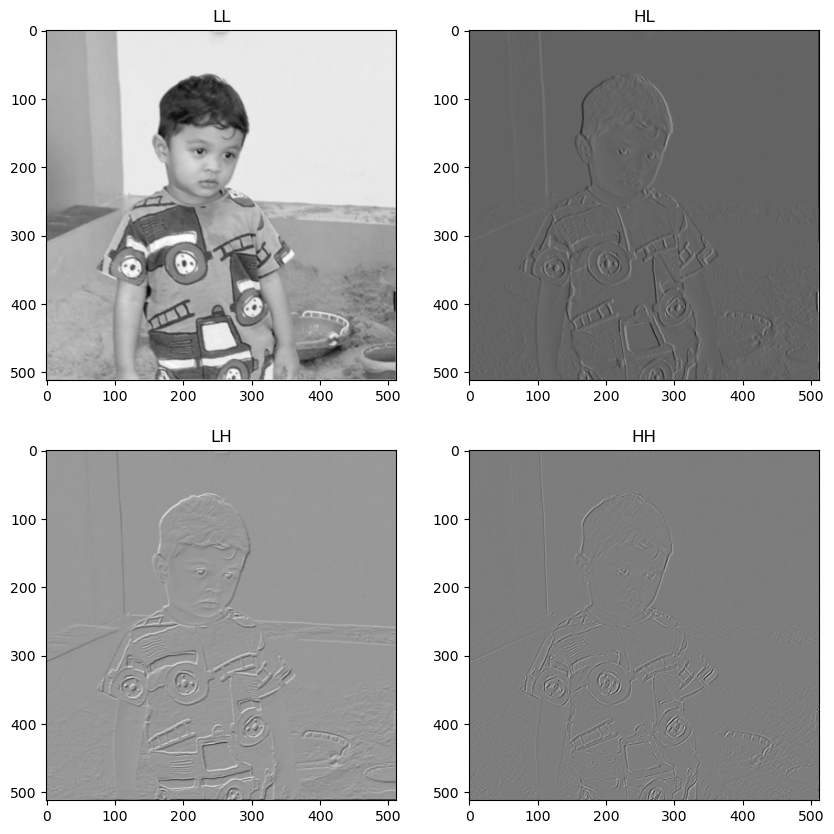

In [471]:

plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(a, cmap='gray'), plt.title("LL")
plt.subplot(222), plt.imshow(b, cmap='gray'), plt.title("HL")
plt.subplot(223), plt.imshow(c, cmap='gray'), plt.title("LH")
plt.subplot(224), plt.imshow(d, cmap='gray'), plt.title("HH")

pada code diatas merupakan code untuk menampilkan hasil dekomposisi level 1 setelah dilakukannya rekonstruksi pada citra dan akan ditampilkan empat bagian dekomposisi yaitu LL, HL, LH, dan HH.

NOMOR 3

Lakukan Dekomposisi Wavelet Level 2 pada hasil dekomposisi level 1 menggunakan kernel x

In [472]:
def Display (LL, HL, LH, HH):
    atas = np.concatenate ((LL, HL), axis = 1)
    bawah = np.concatenate ((LH, HH), axis = 1)
    hasil  = np.concatenate ((atas, bawah), axis=0)
    return hasil

pada code diatas merupakan sebuah fungsi yang berguna untuk menggabungkan LL, HL, LH, HH menjadi satu dengan menggunakan fungsi concatenate sehingga memudahkan saat melakukan menampilkan hasil dari dekomposisi level 2 yang telah dilakukan setelah dekompoisisi level 1

In [473]:
ll2, hl2, lh2, hh2 = dekomposisi(a)

bagian ini merupakan bagian untuk melakukan dekomposisi level 2 dengan melakukan dekomposisi pada LL level 1 dengan menggunakan fungsi dekomposisi yang telah dibuat sebelumnya.

In [474]:
level2 = Display(ll2, hl2, lh2, hh2)

pda code ini akan berfungsi untuk menggabungkan antara LL2, HL2, LH2, dan HH2 kedalam satu gambar dengan menggunakan fungsi display yang sudah dibuat sebelumnya.

In [475]:
hasil1 = Display(level2, b, c,d)

pada code ini berfungsi sebagai hasil dari melakukan dekomposisi level 2 dan menggabungkan gambar tersebut menjadi satu sehingga dapat ditampilkan seperti pada contoh jurnal yang telah disediakan sebelumnya.

Text(0.5, 1.0, 'Hasil Dekomposisi Wavelet Level 2')

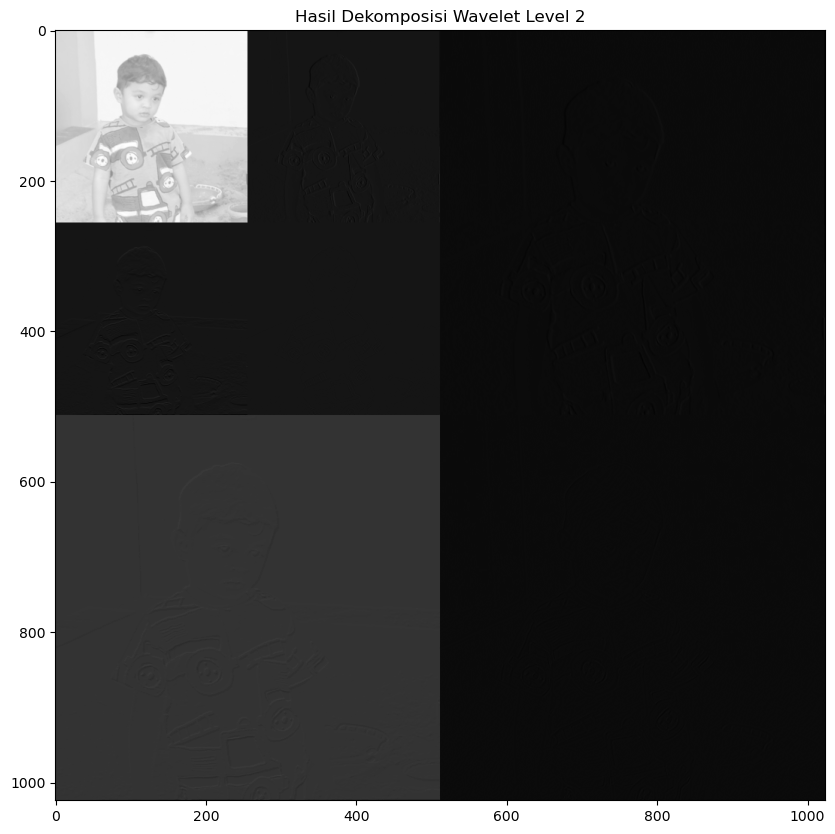

In [476]:
plt.figure(figsize=(10,10))
plt.imshow(hasil1, cmap='gray')
plt.title('Hasil Dekomposisi Wavelet Level 2')

code diatas merupakan code yang berfungsi untuk menampilkan hasil dari dekomposisi level 2 setelah dilakukannya dekomposisi level 1 pada nomor 2 sebelumnya sehingga akan menghasilkan dekomposisi level 2 seperti gamar diatas.